# data

In [16]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
                header=None)

In [5]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

**encode label**

In [6]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
le.transform(['M', 'B'])

array([1, 0])

In [12]:
X.shape

(569, 30)

In [19]:
(X == np.nan).sum()

0

**train test split**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=.3, stratify=y, random_state=1)

# model

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

**pipeline**

In [25]:
from sklearn.pipeline import make_pipeline

In [92]:
pipe_lr = make_pipeline(StandardScaler(),
                       PCA(n_components=2),
                       LogisticRegression(penalty='l2', max_iter=10000))

**Stratified K Fold cross validation**

In [30]:
from sklearn.model_selection import StratifiedKFold

In [31]:
skf = StratifiedKFold(n_splits=10)

**Cross val score**

In [32]:
from sklearn.model_selection import cross_val_score

In [38]:
scores = cross_val_score(
    pipe_lr,
    X_train, y_train,
    cv=skf
)

In [36]:
scores.mean()

0.9543546365914788

**learning curve**

In [37]:
from sklearn.model_selection import learning_curve

In [81]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_lr,
    X=X_train, 
    y=y_train,
    cv=skf,
    train_sizes=np.linspace(.1, 1, 10)
)

In [82]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

visualize

In [83]:
from matplotlib import pyplot as plt

(0.5, 1.05)

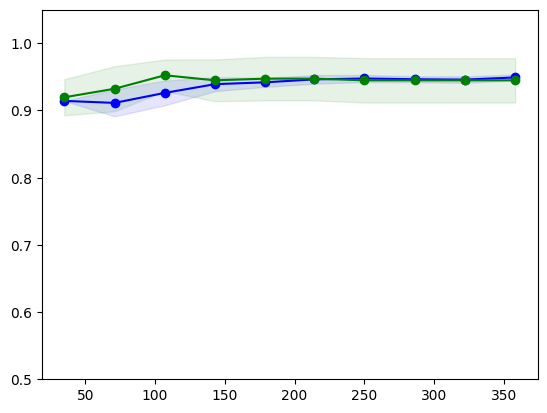

In [84]:
plt.plot(train_sizes, 
         train_mean,
        marker='o', 
        color='blue',
        label='learning curve')
plt.fill_between(train_sizes, 
                train_mean+train_std,
                train_mean-train_std,
                color='blue',
                alpha=.1)

plt.plot(train_sizes, 
         test_mean,
        marker='o', 
        color='green',
        label='learning curve')
plt.fill_between(train_sizes, 
                test_mean+test_std,
                test_mean-test_std,
                color='green',
                alpha=.1)

plt.ylim(.5, 1.05)

**validation curve**

In [93]:
from sklearn.model_selection import validation_curve

In [94]:
param_range = [10**(i) for i in range(-4, 4)]

In [95]:
train_scores, test_scores = validation_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    cv=skf,
    param_name='logisticregression__C',
    param_range=param_range
)

In [96]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

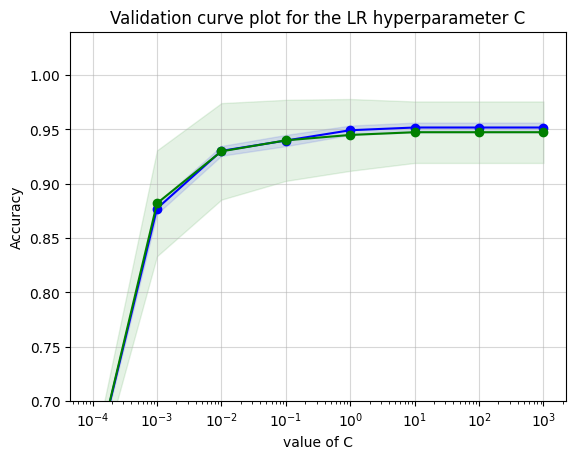

In [99]:
plt.plot(param_range, 
         train_mean,
        marker='o', 
        color='blue',
        label='learning curve')
plt.fill_between(param_range, 
                train_mean+train_std,
                train_mean-train_std,
                color='blue',
                alpha=.1)

plt.plot(param_range, 
         test_mean,
        marker='o', 
        color='green',
        label='learning curve')
plt.fill_between(param_range, 
                test_mean+test_std,
                test_mean-test_std,
                color='green',
                alpha=.1)

plt.title('Validation curve plot for the LR hyperparameter C')
plt.ylabel('Accuracy')
plt.xlabel('value of C')
plt.grid(alpha=.5)
plt.xscale('log')
plt.ylim(.7, 1.04)
plt.show()

=> we can see that the model
slightly underfits the data when we increase the regularization strength (small values of C). However, for large values of C, it means lowering the strength of regularization, so the model tends to slightly overfit the data?. In this case, the sweet spot appears to be between 0.01 and 0.1 of the C value.